In [5]:
import cv2
import matplotlib.pyplot as plt

'\n# these functions are used for direct detection from webcam\ncap = cv.VideoCapture(1) \ncap.set(3, 648)\ncap.set(4, 488)\n'

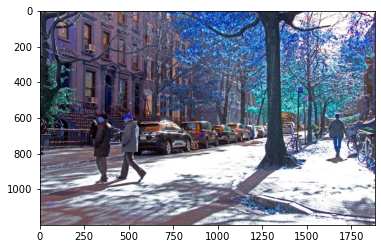

In [23]:
# the configPath and weightsPath are both downloaded from the website:
# https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'

cvNet = cv2.dnn_DetectionModel(weightsPath, configPath)

img = cv2.imread('example.jpg')
plt.imshow(img)
"""
# these functions are used for direct detection from webcam
cap = cv.VideoCapture(1) 
cap.set(3, 648)
cap.set(4, 488)
"""

In [14]:
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BRG2RGB))

AttributeError: module 'cv2' has no attribute 'COLOR_BRG2RGB'

In [24]:
"""Import the image that will be used to detect objects. The image is named as example.jpg, and read with imread() method.

cv.dnn is the mostly used method to load the model for image detection. The model is provided from the OpenCV official website.

We then need labels to check the right answers is obtained.
"""
classNames = []
# classes for the object detection are copied from the following website:
# https://github.com/pjreddie/darknet/blob/master/data/coco.names
classFile = 'coco.names.txt'
with open(classFile, 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n') # this is the same as classNames.append(f.read())
    
print(classNames)

# these are set by default when using dnn_DetectionModel
cvNet.setInputSize(320, 320)
cvNet.setInputScale(1.0/127.5) # 255/2 = 127.5
cvNet.setInputMean((127.5, 127.5, 127.5)) # Mobilenet => [-1, 1]
cvNet.setInputSwapRB(True)

# while True:
# success, img = cap.read()
classIds, confs, bbox = cvNet.detect(img, confThreshold = 0.5)

# set the font size and type
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN

# inside the while True loop, if len(classIds != 0):
for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
    cv2.rectangle(img, box, color = (0, 255, 0), thickness = 3) # setting the rectangles to the detected objects
    cv2.putText(img, classNames[classId - 1], (box[0] + 10, box[1] + 30),
               font, fontScale = font_scale, color = (0, 255, 0),thickness = 2)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [26]:
# show image with rectangles marked
cv2.imshow('img', img)
cv2.waitKey()

"""It shows the original image with rectangle that detects objects. As an instance with the example.jpg picture, it will give two rectangles labeled with dog and cat."""

'It shows the original image with rectangle that detects objects. As an instance with the example.jpg picture, it will give two rectangles labeled with dog and cat.'